In [36]:
from matplotlib import pyplot as plt

In [37]:
import numpy as np 

class LIF():
    I_inj: float = 1e-4
    C_m: float = 1e-6
    R_m: float = 1e6
    V_reset: float = 0.1
    V_0: float = 0.05
    V_th: float = 0.4
    V_init: float = 0

    def __init__(self, I_inj = I_inj, C_m = C_m, R_m = R_m, V_reset = V_reset, V_0 = V_0, V_th = V_th) -> None:
        self.I_inj = I_inj
        self.C_m = C_m
        self.R_m = R_m
        self.V_reset = V_reset
        self.V_0 = V_0
        self.V_th = V_th


    def initial_conditions(self, V_init = V_init) -> None:
        self.V_init = V_init

    def calculate(self, time_interval: float = 0.1, dots: int = 100000) -> tuple:
        self.V = [self.V_init]
        time_array = np.linspace(0, time_interval, dots)
        delta_t = time_array[1] - time_array[0]
        for i in range(dots - 1):
            if self.V[i] >= self.V_th:
                self.V.append(self.V_reset)
            else:
                self.V.append((self.I_inj - (self.V[i] - self.V_0)/self.R_m) * delta_t / self.C_m + self.V[i])
        return time_array, self.V

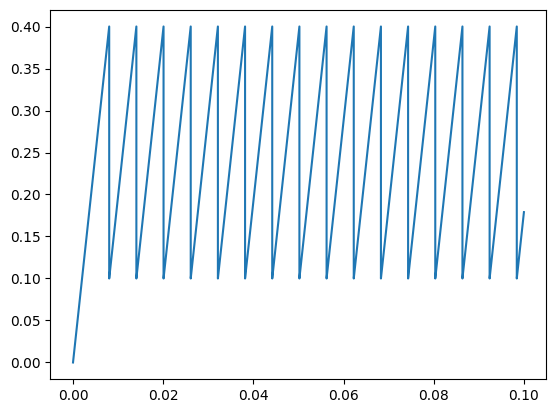

In [40]:
l = LIF(I_inj=5e-5)

t, v = l.calculate()

plt.plot(t, v)